In [25]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp, healsparse as hsp

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import os
if os.environ['USER'] == 'dhayaa':
    os.environ['PATH'] = f"{os.environ['PATH']}:/software/texlive-2022-el8-x86_64/bin/x86_64-linux/"
    
%matplotlib inline

COLORS = ["f07167","219ebc","c767ac","ffb703","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

# Load DECADE

In [2]:
master_mask = hp.read_map('/project/chihway/data/decade/footprint_mask_delve_cs_20240209.fits')

In [44]:
maglim_g = hp.read_map('/project/chihway/data/decade/SP_maps/maglim/delve_dr311+dr312_g_maglim_Nov28th.fits')
maglim_r = hp.read_map('/project/chihway/data/decade/SP_maps/maglim/delve_dr311+dr312_r_maglim_Nov28th.fits')
maglim_i = hp.read_map('/project/chihway/data/decade/SP_maps/maglim/delve_dr311+dr312_i_maglim_Nov28th.fits')
maglim_z = hp.read_map('/project/chihway/data/decade/SP_maps/maglim/delve_dr311+dr312_z_maglim_Nov28th.fits')

maglim_g = hp.reorder(maglim_g, n2r = True)[master_mask > 0]
maglim_r = hp.reorder(maglim_r, n2r = True)[master_mask > 0]
maglim_i = hp.reorder(maglim_i, n2r = True)[master_mask > 0]
maglim_z = hp.reorder(maglim_z, n2r = True)[master_mask > 0]

In [45]:
# p = f'/scratch/midway2/dhayaa/y3a2_decasu_i_maglimit_wmean.hs'
# maglim_i_des = hsp.HealSparseMap.read(p).generate_healpix_map(nside = 4096, nest = False)
# maglim_i_des = maglim_i_des[maglim_i_des > 0]

In [46]:
maglim_r_des = fits.open('/scratch/midway3/dhayaa/y3a2_r_o.4096_t.32768_maglim_EQU.fits.gz')[1].data['SIGNAL']
maglim_i_des = fits.open('/scratch/midway3/dhayaa/y3a2_i_o.4096_t.32768_maglim_EQU.fits.gz')[1].data['SIGNAL']
maglim_z_des = fits.open('/scratch/midway3/dhayaa/y3a2_z_o.4096_t.32768_maglim_EQU.fits.gz')[1].data['SIGNAL']

23.63, 23.18, 22.59
23.95, 23.34, 22.63


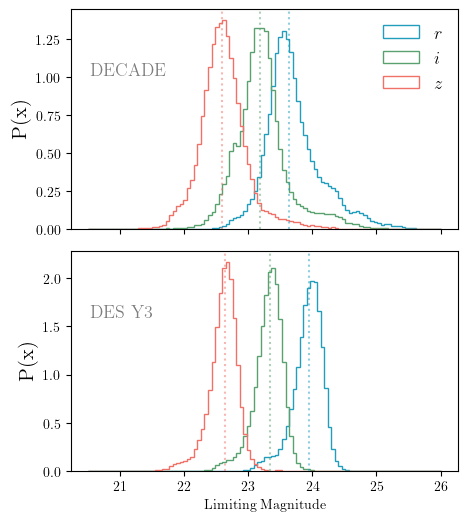

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(5,6), sharex = True, sharey = False)
plt.subplots_adjust(hspace = 0.1)
ax[0].hist(maglim_r, bins=100, range=(20.5,26), density=True, histtype="step", label = '$r$', color=COLORS[1])
ax[0].hist(maglim_i, bins=100, range=(20.5,26), density=True, histtype="step", label = '$i$', color=COLORS[4])
ax[0].hist(maglim_z, bins=100, range=(20.5,26), density=True, histtype="step", label = '$z$', color=COLORS[0])

ax[1].hist(maglim_r_des, bins=100, range=(20.5,26), density=True, histtype="step", label = '$r$', color=COLORS[1])
ax[1].hist(maglim_i_des, bins=100, range=(20.5,26), density=True, histtype="step", label = '$i$', color=COLORS[4])
ax[1].hist(maglim_z_des, bins=100, range=(20.5,26), density=True, histtype="step", label = '$z$', color=COLORS[0])

ax[1].set_xlabel("Limiting Magnitude")
ax[1].set_ylabel("P(x)", size = 15)
ax[0].set_ylabel("P(x)", size = 15)

med_g = np.median(maglim_g[maglim_g>0])
med_r = np.median(maglim_r[maglim_r>0])
med_i = np.median(maglim_i[maglim_i>0])
med_z = np.median(maglim_z[maglim_z>0])

print(f"{med_r:.2f}, {med_i:.2f}, {med_z:.2f}")

ax[0].axvline(med_r, color=COLORS[1], ls=':', alpha=0.5)
ax[0].axvline(med_i, color=COLORS[4], ls=':', alpha=0.5)
ax[0].axvline(med_z, color=COLORS[0], ls=':', alpha=0.5)


med_r = np.median(maglim_r_des)
med_i = np.median(maglim_i_des)
med_z = np.median(maglim_z_des)

print(f"{med_r:.2f}, {med_i:.2f}, {med_z:.2f}")

ax[1].axvline(med_r, color=COLORS[1], ls=':', alpha=0.5)
ax[1].axvline(med_i, color=COLORS[4], ls=':', alpha=0.5)
ax[1].axvline(med_z, color=COLORS[0], ls=':', alpha=0.5)


ax[0].text(0.05, 0.7, 'DECADE', fontsize = 13, color = 'k', alpha = 0.5, transform = ax[0].transAxes)
ax[1].text(0.05, 0.7, 'DES Y3', fontsize = 13, color = 'k', alpha = 0.5, transform = ax[1].transAxes)

# plt.ylim(0,1.4)
ax[0].legend(frameon = False, fontsize = 13)

plt.savefig('./maglim_hist.pdf', facecolor="white", bbox_inches='tight', dpi = 300)

In [51]:
print(np.average(maglim_r > np.percentile(maglim_r_des, 99)))
print(np.average(maglim_i > np.percentile(maglim_i_des, 99)))
print(np.average(maglim_z > np.percentile(maglim_z_des, 99)))

0.09177679960354793
0.09745618754091062
0.08387524328687238
